In [1]:
%load_ext Cython

import os
import numpy as np
include = np.get_include()
os.environ['C_INCLUDE_PATH'] = include  # for linux/macos
os.environ['INCLUDE'] = include  # for windows

## 扩展指标

### BIAS

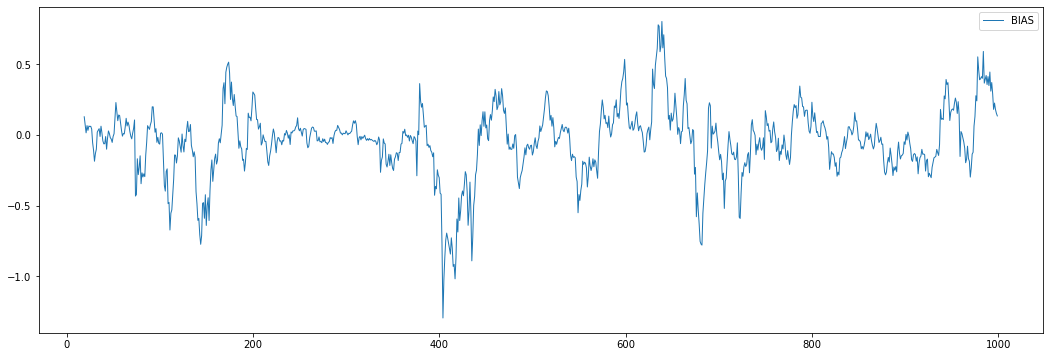

In [2]:
%%cython -c=-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION --verbose
#cython: language_level=3str

import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport indicators as ta
with open("tests/test_data.bin", "rb") as f:
    data = pickle.load(f)
bias = ta.BIAS(data['close'], 20)
plt.plot(bias, label="BIAS", linewidth=1)
plt.legend(loc="best")

### MACD

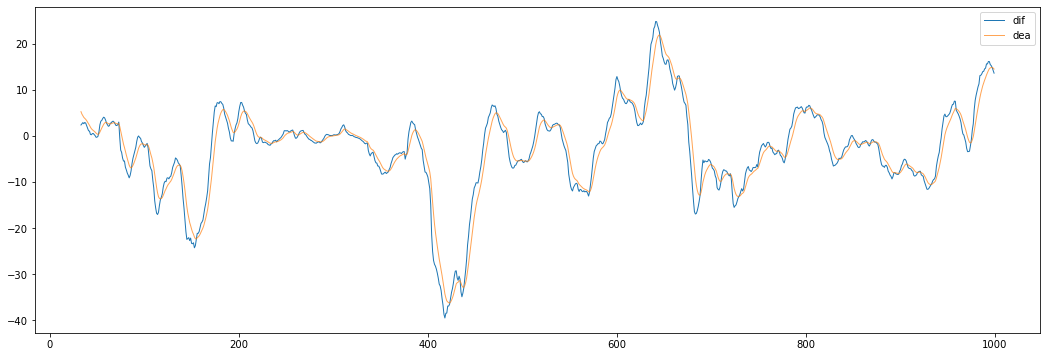

In [3]:
%%cython -c=-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION --verbose
#cython: language_level=3str

import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport indicators as ta
with open("tests/test_data.bin", "rb") as f:
    data = pickle.load(f)
dif, dea, hist = ta.MACD(data['close'], 12, 26, 9)
plt.plot(dif, label="dif", linewidth=1)
plt.plot(dea, label="dea", linewidth=1, alpha=0.7)
plt.legend(loc="best")

### KD

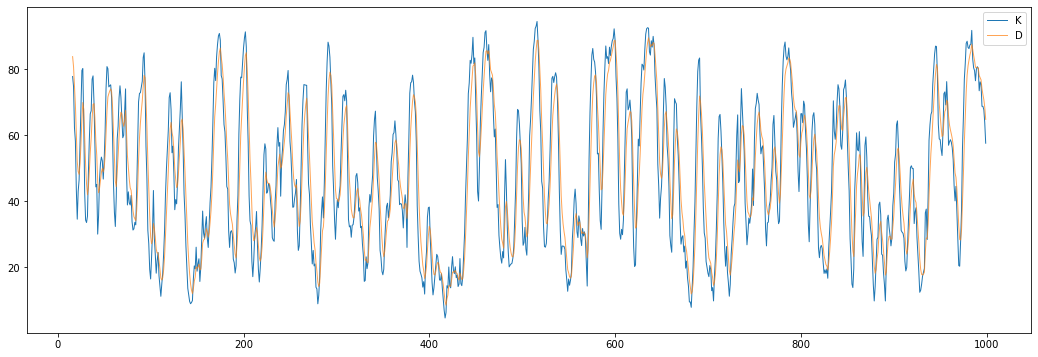

In [4]:
%%cython -c=-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION --verbose
#cython: language_level=3str

import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport indicators as ta
with open("tests/test_data.bin", "rb") as f:
    data = pickle.load(f)
k, d = ta.KD(data['high'], data['low'], data['close'], 9, 3, 3)
plt.plot(k, label="K", linewidth=1)
plt.plot(d, label="D", linewidth=1, alpha=0.7)
plt.legend(loc="best")

### KDJ

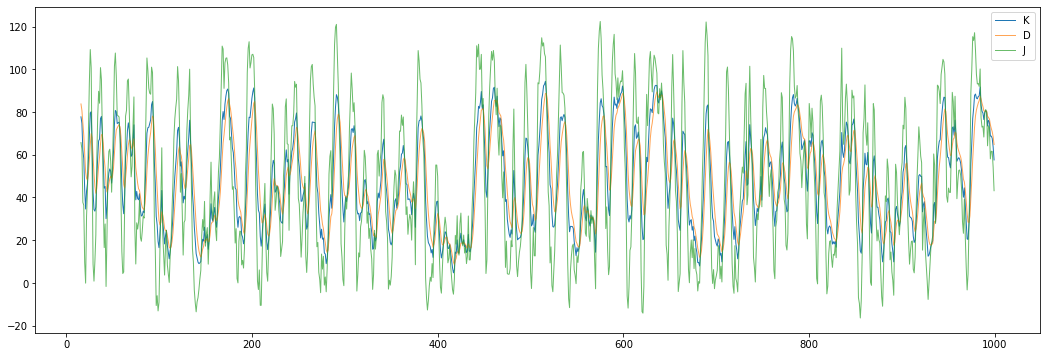

In [5]:
%%cython -c=-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION --verbose
#cython: language_level=3str

import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport indicators as ta
with open("tests/test_data.bin", "rb") as f:
    data = pickle.load(f)
k, d, j = ta.KDJ(data['high'], data['low'], data['close'], 9, 3, 3)
plt.plot(k, label="K", linewidth=1)
plt.plot(d, label="D", linewidth=1, alpha=0.7)
plt.plot(j, label="J", linewidth=1, alpha=0.7)
plt.legend(loc="best")

### SLOW_KD

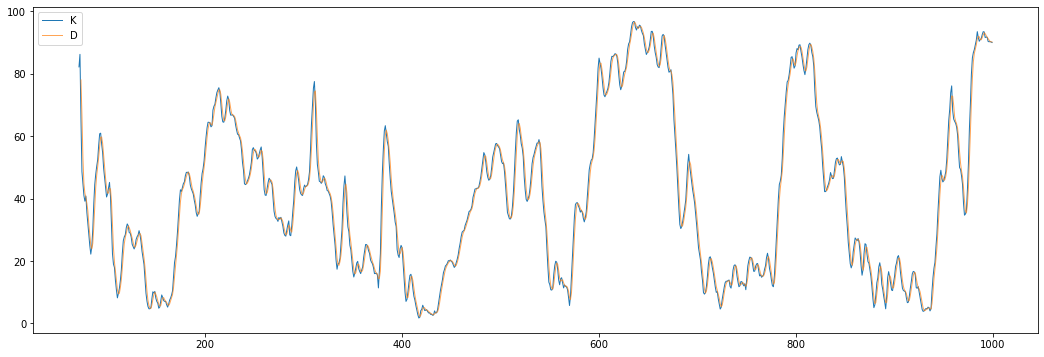

In [6]:
%%cython -c=-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION --verbose
#cython: language_level=3str

import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport indicators as ta
with open("tests/test_data.bin", "rb") as f:
    data = pickle.load(f)
k, d = ta.SLOW_KD(data['high'], data['low'], data['close'], 69, 3)
plt.plot(k, label="K", linewidth=1)
plt.plot(d, label="D", linewidth=1, alpha=0.7)
plt.legend(loc="best")

### AMPLITUDE

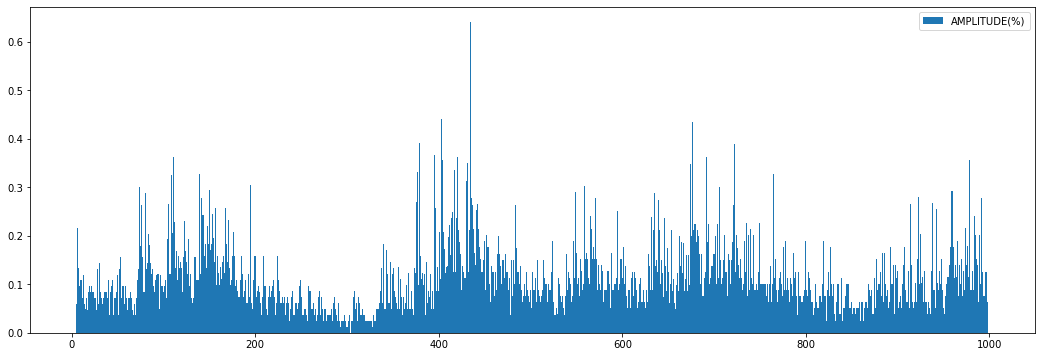

In [7]:
%%cython -c=-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION --verbose
#cython: language_level=3str

import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport indicators as ta
with open("tests/test_data.bin", "rb") as f:
    data = pickle.load(f)
amp = ta.AMPLITUDE(data['high'], data['low'], data['close'], 5)
# print(amp)
plt.bar(range(len(amp)), amp*100, width=1.0, label="AMPLITUDE(%)")
plt.legend(loc="best")

### ZIG

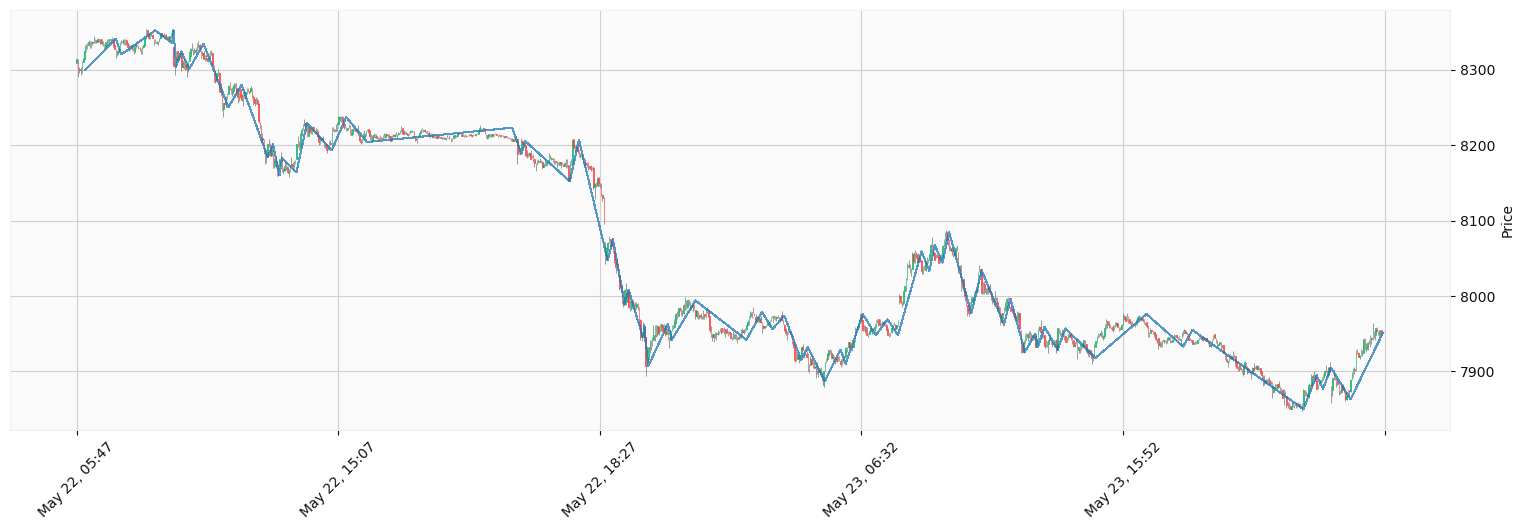

In [8]:
%%cython -c=-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION --verbose
#cython: language_level=3str

import pickle
from ta_formula cimport indicators as ta
with open("tests/test_data.bin", "rb") as f:
    data = pickle.load(f)
import mplfinance as mpf
import pandas as pd
import numpy as np

points = ta.ZIG(data['close'], 0.002)

df = pd.DataFrame(data)
df['dt'] = pd.to_datetime(df['dt'], unit='s')
df = df.set_index("dt")

mask = np.isfinite(points)
points = points[mask]
xs = df.index[mask]

ic = [ ]

mpf.plot(df, volume=False, addplot=ic, style='yahoo', type='candle', figsize=(20,6), warn_too_much_data=1000, alines=dict(alines=list(zip(xs, points)),linewidths=0.75,alpha=0.75))

## 区间指标

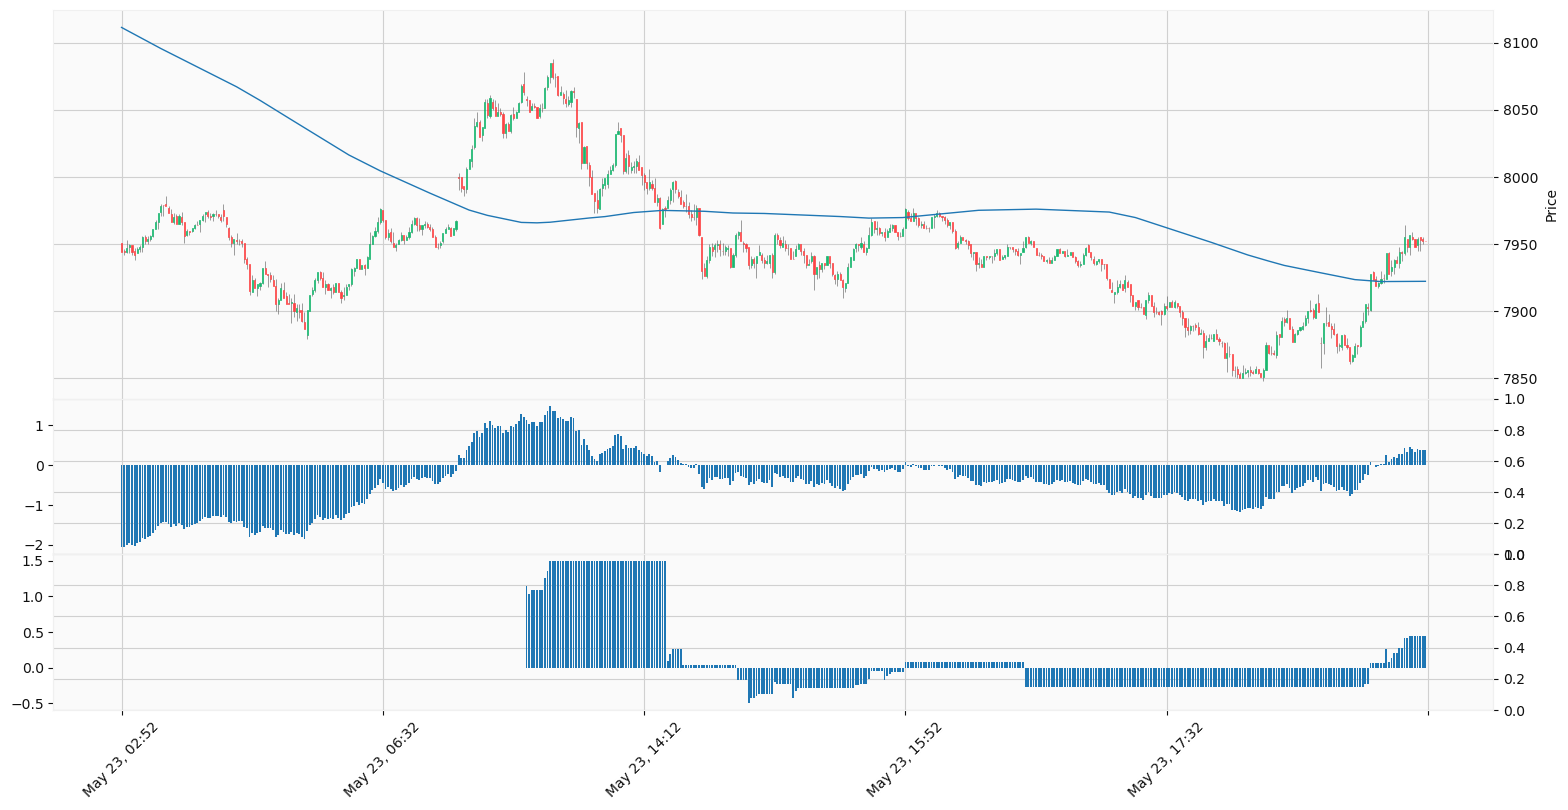

In [9]:
%%cython -c=-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION --verbose

import pickle
from ta_formula cimport indicators as ta
with open("tests/test_data.bin", "rb") as f:
    data = pickle.load(f)
import mplfinance as mpf
import pandas as pd

period_max_bias = ta.PERIOD_MAX_BIAS(data['close'], 250, 0)
ma250 = ta.SMA(data['close'], 250)
bias = ta.BIAS(data['close'], 250)
ic = [
    mpf.make_addplot(ma250[500:], width=1),
    mpf.make_addplot(bias[500:], type='bar', width=0.7, panel=1, secondary_y=True),
    mpf.make_addplot(period_max_bias[500:], type='bar', width=0.7, panel=2, secondary_y=True),
]

df = pd.DataFrame(data)
df['dt'] = pd.to_datetime(df['dt'], unit='s')
df = df.set_index("dt")
mpf.plot(df.tail(500), volume=False, addplot=ic, style='yahoo', type='candle', figsize=(20,10))

## 策略

In [1]:
from ta_formula.strategy import Strategy
strategy = Strategy('test_strategy.pyx', {}, ["open", "close", "last_close_price", "last_ma250"])
print(f'{strategy!r}')


# THIS IS AUTO GENERATED FILE, DO NOT MODIFY THIS FILE

#cython: language_level=3str
cimport ta_formula.indicators as ta


def calculate(CLOSE, HIGH, LOW):
    
    cdef int _ma5_defined = 0
    _ma5 = None
    def ma5():
        nonlocal _ma5_defined, _ma5
        if _ma5_defined == 0:
            _ma5 = ta.SMA(CLOSE, 5)
            _ma5_defined = 1
        return _ma5

    cdef int _ma250_defined = 0
    _ma250 = None
    def ma250():
        nonlocal _ma250_defined, _ma250
        if _ma250_defined == 0:
            _ma250 = ta.SMA(CLOSE, 250)
            _ma250_defined = 1
        return _ma250

    cdef int _skd_defined = 0
    _skd = None
    def skd():
        nonlocal _skd_defined, _skd
        if _skd_defined == 0:
            _skd = ta.stream_SLOW_KD(HIGH, LOW, CLOSE, 69, 3)
            _skd_defined = 1
        return _skd


    return {
        'open_long_condition1': ta.kup(ma250(), -1) and ta.crossdown(ma5(), ma250(), -1), 
        'open_short_condition1': ta.kdown(ma250(

In [2]:
import pickle
with open("tests/test_data.bin", "rb") as f:
    data = pickle.load(f)

strategy.feed_datas([[data]])
strategy.calculate()

{'open_long_condition1': False,
 'open_short_condition1': False,
 'open_long_condition2': False,
 'open_short_condition2': False,
 'close_long': False,
 'close_short': False,
 'last_close_price': 7952.0,
 'last_ma250': 7922.2}

In [3]:
%timeit strategy.calculate()

The slowest run took 13.77 times longer than the fastest. This could mean that an intermediate result is being cached.
333 µs ± 235 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 数据流入-信号流出框架

### 多线程版本

In [4]:
import logging
import threading
import time

from ta_formula.dataflow import open_signal_stream
from ta_formula.dataflow_misc import DictRequestParser
from ta_formula.datasource import DataBackend, add_backend, close_all_backends

logging.basicConfig(level='DEBUG')

class MyDataBackend(DataBackend):

    def __init__(self, bid, config) -> None:
        super().__init__(bid, config)
        # connect to ip:port here
        # ... 

    def prepare(self, symbols: list, intervals: list):
        # 直接用本地数据测试
        for symbol in symbols:
            for interval in intervals:
                self.add_data(symbol, interval, data)

        # 模拟数据刷新线程...
        self.quit = False
        self.t = threading.Thread(target=self.stream_downloader)
        self.t.start()

    def stream_downloader(self):
        while not self.quit:
            time.sleep(0.1)
            self.on_update('ag2412', '5m')
            time.sleep(0.1)
            self.on_update('al2408', '5m')

    def close(self):
        self.quit = True
        self.t.join()

# 2种添加数据后台的方法，任选其一即可：
add_backend("MyDataBackend", "shanghai001", {"ip": "192.168.2.100", "port": 9999})
add_backend(MyDataBackend("shanghai001", {"ip": "192.168.2.100", "port": 9999}))

# 订阅参数
request = DictRequestParser({
    # 数据源引用了上诉编号为shanghai001的MyDataBackend后台，策略同时订阅两个标的物的信号
    "datasources": [["ag2412@shanghai001"], ["al2408@shanghai001"]],
    "pyx_file": "test_strategy.pyx",
    "params": {},
    "return_fields": ["open", "close", "last_close_price"],
    "datas": [["5m"]], # 将策略默认K线从1m 改成5m
})

t = 0
# 开始将数据流转化成信号流
for signal in open_signal_stream(request):
    print(signal)
    # 方便测试，这里只输出10条就退出
    t += 1
    if t > 10:
        break

close_all_backends()

DEBUG:root:MyDataBackend(shanghai001, {'ip': '192.168.2.100', 'port': 9999}) Added
DEBUG:root:_CalculateUnit(test_strategy.pyx_5615451165093743097, [(MyDataBackend(shanghai001), 'ag2412', ['5m'])], -4467247855602062667): New. Ref count 1
DEBUG:root:_CalculateUnit(test_strategy.pyx_5615451165093743097, [(MyDataBackend(shanghai001), 'al2408', ['5m'])], 5408343003518269984): New. Ref count 1


{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': -4467247855602062667, 'data_update_time': 0, 'data_rec_time': 1741156688.1179872, 'calc_time': 333855, 'symbols': [('shanghai001', 'ag2412')]}
{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': 5408343003518269984, 'data_update_time': 0, 'data_rec_time': 1741156688.22243, 'calc_time': 220361, 'symbols': [('shanghai001', 'al2408')]}
{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': -4467247855602062667, 'data_update_time': 0, 'data_rec_time': 1741156688.32

DEBUG:root:_CalculateUnit(test_strategy.pyx_5615451165093743097, [(MyDataBackend(shanghai001), 'ag2412', ['5m'])], -4467247855602062667): Delete. Ref count 0
DEBUG:root:_CalculateUnit(test_strategy.pyx_5615451165093743097, [(MyDataBackend(shanghai001), 'al2408', ['5m'])], 5408343003518269984): Delete. Ref count 0
DEBUG:root:MyDataBackend(shanghai001) Shutdown


{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': -4467247855602062667, 'data_update_time': 0, 'data_rec_time': 1741156689.153687, 'calc_time': 437297, 'symbols': [('shanghai001', 'ag2412')]}


### Asyncio版本

In [5]:
import asyncio
import logging

from ta_formula.dataflow_aio import open_signal_stream
from ta_formula.datasource import AioDataBackend, add_backend, close_all_backends_async

logging.basicConfig(level='DEBUG')

class MyAioDataBackend(AioDataBackend):

    def __init__(self, bid, config) -> None:
        super().__init__(bid, config)
        # connect to ip:port here
        # ... 

    async def prepare(self, symbols: list, intervals: list):
        # 直接用本地数据测试
        for symbol in symbols:
            for interval in intervals:
                self.add_data(symbol, interval, data)

        # 模拟数据刷新...
        self.quit = False
        self.t = asyncio.create_task(self.stream_downloader())

    async def stream_downloader(self):
        while not self.quit:
            await asyncio.sleep(1)
            self.on_update('ag2412', '5m')
            self.on_update('al2408', '5m')

    async def close(self):
        self.quit = True
        await self.t

add_backend("MyAioDataBackend", "shanghai002", {"ip": "192.168.2.100", "port": 9999})


async def main():
    # 订阅参数
    request = DictRequestParser({
        "datasources": [["ag2412@shanghai002"], ["al2408@shanghai002"]],
        "pyx_file": "test_strategy.pyx",
        "params": {},
        "return_fields": ["open", "close", "last_close_price"],
        "datas": [["5m"]], # 将策略默认K线从1m 改成5m
    })

    t = 0
    # 开始将数据流转化成信号流
    async for signal in open_signal_stream(request):
        print(signal)
        # 方便测试，这里只输出10条就退出
        t += 1
        if t > 10:
            break

    await close_all_backends_async()

loop = asyncio.get_event_loop()
# loop.run_until_complete(main())
await main()

DEBUG:root:MyAioDataBackend(shanghai002, {'ip': '192.168.2.100', 'port': 9999}) Added
DEBUG:root:_CalculateUnit(test_strategy.pyx_5615451165093743097, [(MyAioDataBackend(shanghai002), 'ag2412', ['5m'])], 4290790836571583996): New. Ref count 1
DEBUG:root:_CalculateUnit(test_strategy.pyx_5615451165093743097, [(MyAioDataBackend(shanghai002), 'al2408', ['5m'])], -4280362378017634969): New. Ref count 1


{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': 4290790836571583996, 'data_update_time': 0, 'data_rec_time': 1741156690.342806, 'calc_time': 303050, 'symbols': [('shanghai002', 'ag2412')]}
{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': -4280362378017634969, 'data_update_time': 0, 'data_rec_time': 1741156690.3429692, 'calc_time': 277501, 'symbols': [('shanghai002', 'al2408')]}
{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': 4290790836571583996, 'data_update_time': 0, 'data_rec_time': 1741156691.34

DEBUG:root:MyAioDataBackend(shanghai002) Shutdown
DEBUG:root:_CalculateUnit(test_strategy.pyx_5615451165093743097, [(MyAioDataBackend(shanghai002), 'ag2412', ['5m'])], 4290790836571583996): Delete. Ref count 0
DEBUG:root:_CalculateUnit(test_strategy.pyx_5615451165093743097, [(MyAioDataBackend(shanghai002), 'al2408', ['5m'])], -4280362378017634969): Delete. Ref count 0


{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': 4290790836571583996, 'data_update_time': 0, 'data_rec_time': 1741156695.362824, 'calc_time': 268684, 'symbols': [('shanghai002', 'ag2412')]}
